In [2]:
from bs4 import BeautifulSoup
import requests
import os
from selenium import webdriver
import pandas as pd
import numpy as np
import time
from splinter import Browser
import webbrowser
import matplotlib.pyplot as plt



In [162]:
# def scrape():

browser = Browser('chrome', executable_path="chromedriver", headless=False)
top_songs_url = "https://soundcloud.com/charts/top?genre=all-music&country=US"
browser.visit(top_songs_url)
time.sleep(60)

html = browser.html
soup = BeautifulSoup(html, 'html.parser')
topChart = soup.find('div', class_='chartTracks lazyLoadingList')
songs = topChart.find_all('li', class_='chartTracks__item')

songNames = []
chartPosition = []
artists = []
weeklyListenCount = []
allTimeListenCount = []
for song in songs:
    
        position = song.find('div',class_ = 'chartTrack__position sc-font-tabular')
        positionNumber = position.text.strip()
        chartPosition.append(positionNumber)

        trackDetails = song.find('div', class_ = 'chartTrack__details')
        artistName = song.find(class_='sc-link-light')
        names = artistName.text.strip()
        cleanedNames = names.replace('\x7f',"")
        artists.append(cleanedNames)

        weeklyPlayHiddenScore = song.find(class_='sc-visuallyhidden')
        weeklyPlayAmount = weeklyPlayHiddenScore.text.strip()
        weeklyListenCount.append(weeklyPlayAmount)
        
        songName = song.find(class_="sc-link-dark")
        nameText = songName.text.strip()
        songNames.append(nameText)
        
        allTimePlayHiddenScore = song.find(class_='chartTrack__scoreAllPlays')
        allPlayHiddenScore = allTimePlayHiddenScore.find(class_='sc-visuallyhidden')
        allPlayAmount = allPlayHiddenScore.text.strip()
        allTimeListenCount.append(allPlayAmount)
        

# print(chartPosition)
# print(artists)
# print(weeklyListenCount)
# print(songNames)
# print(allTimeListenCount)


allMusicDataFrame = pd.DataFrame(list(zip(chartPosition,songNames,artists,weeklyListenCount,allTimeListenCount)), 
                              columns=['Chart Position', 'Song Name', 'Artist', 'Weekly Play Count', 'All Time Play Count'])


In [163]:
allMusicDataFrame.set_index('Chart Position', inplace=True)
allMusicDataFrame

,Song Name,Artist,Weekly Play Count,All Time Play Count
Chart Position,,,,
1,FEFE (Feat. Nicki Minaj & Murda Beatz),6IX9INE,3070589,20182362
2,Lucid Dreams,Juice WRLD,2508409,81340736
3,Taking A Walk (Prod. Scott Storch),Trippie Redd,2216104,4338386
4,XXXTENTACION - Fuck Love (feat. Trippie Redd),XXXTENTACION,1462194,144486370
5,I Kill People! ft Tadoe & Chief Keef [Produced...,Trippie Redd,1420034,29932449
6,All Girls Are The Same,Juice WRLD,1410152,63487598
7,Missing My Idols,Trippie Redd,1288188,1976369
8,Lean Wit Me,Juice WRLD,1272044,12909653
9,Wasted (feat. Lil Uzi Vert),Juice WRLD,1145129,9191219


In [174]:
#all music

browser = Browser('chrome', executable_path="chromedriver", headless=False)
top_songs_url = "https://soundcloud.com/charts/top?genre=all-music&country=all-countries"
browser.visit(top_songs_url)
time.sleep(60)

html = browser.html
soup = BeautifulSoup(html, 'html.parser')
topChart = soup.find('div', class_='chartTracks lazyLoadingList')
songs = topChart.find_all('li', class_='chartTracks__item')

songNames = []
chartPosition = []
artists = []
weeklyListenCount = []
allTimeListenCount = []
for song in songs:
    
        position = song.find('div',class_ = 'chartTrack__position sc-font-tabular')
        positionNumber = position.text.strip()
        chartPosition.append(positionNumber)

        trackDetails = song.find('div', class_ = 'chartTrack__details')
        artistName = song.find(class_='sc-link-light')
        names = artistName.text.strip()
        cleanedNames = names.replace('\x7f',"")
        artists.append(cleanedNames)

        weeklyPlayHiddenScore = song.find(class_='sc-visuallyhidden')
        weeklyPlayAmount = weeklyPlayHiddenScore.text.strip()
        weeklyListenCount.append(weeklyPlayAmount)
        
        songName = song.find(class_="sc-link-dark")
        nameText = songName.text.strip()
        songNames.append(nameText)
        
        allTimePlayHiddenScore = song.find(class_='chartTrack__scoreAllPlays')
        allPlayHiddenScore = allTimePlayHiddenScore.find(class_='sc-visuallyhidden')
        allPlayAmount = allPlayHiddenScore.text.strip()
        allTimeListenCount.append(allPlayAmount)
        

# print(chartPosition)
# print(artists)
# print(weeklyListenCount)
# print(songNames)
# print(allTimeListenCount)


worldAllMusicDataFrame = pd.DataFrame(list(zip(chartPosition,songNames,artists,weeklyListenCount,allTimeListenCount)), 
                              columns=['Chart Position', 'Song Name', 'Artist', 'Weekly Play Count', 'All Time Play Count'])


In [175]:
worldAllMusicDataFrame.set_index('Chart Position', inplace=True)
worldAllMusicDataFrame

,Song Name,Artist,Weekly Play Count,All Time Play Count
Chart Position,,,,
1,FEFE (Feat. Nicki Minaj & Murda Beatz),6IX9INE,4261463,20185846
2,Lucid Dreams,Juice WRLD,3184795,81343967
3,Taking A Walk (Prod. Scott Storch),Trippie Redd,2749875,4340752
4,تكبيرات العيد,takbeerat,2235725,14451384
5,Adham Seliman - Ya Samra / أدهم سليمان - يا سمرا,Adham Seliman,2042177,11851671
6,XXXTENTACION - Fuck Love (feat. Trippie Redd),XXXTENTACION,1851435,144488494
7,I Kill People! ft Tadoe & Chief Keef [Produced...,Trippie Redd,1699148,29933919
8,All Girls Are The Same,Juice WRLD,1653760,63489328
9,مهرجان انا جدع ايوه انا جدع,abdelrhman Elsaka,1598056,8732447


In [98]:
#alternative rock
    
browser = Browser('chrome', executable_path="chromedriver", headless=False)
top_songs_url = "https://soundcloud.com/charts/top?genre=alternativerock&country=US"
browser.visit(top_songs_url)
time.sleep(60)

html = browser.html
soup = BeautifulSoup(html, 'html.parser')
topChart = soup.find('div', class_='chartTracks lazyLoadingList')
songs = topChart.find_all('li', class_='chartTracks__item')

songNames = []
chartPosition = []
artists = []
weeklyListenCount = []
allTimeListenCount = []
for song in songs:
    
        position = song.find('div',class_ = 'chartTrack__position sc-font-tabular')
        positionNumber = position.text.strip()
        chartPosition.append(positionNumber)

        trackDetails = song.find('div', class_ = 'chartTrack__details')
        artistName = song.find(class_='sc-link-light')
        names = artistName.text.strip()
        cleanedNames = names.replace('\x7f',"")
        artists.append(cleanedNames)

        weeklyPlayHiddenScore = song.find(class_='sc-visuallyhidden')
        weeklyPlayAmount = weeklyPlayHiddenScore.text.strip()
        weeklyListenCount.append(weeklyPlayAmount)
        
        songName = song.find(class_="sc-link-dark")
        nameText = songName.text.strip()
        songNames.append(nameText)
        
        allTimePlayHiddenScore = song.find(class_='chartTrack__scoreAllPlays')
        allPlayHiddenScore = allTimePlayHiddenScore.find(class_='sc-visuallyhidden')
        allPlayAmount = allPlayHiddenScore.text.strip()
        allTimeListenCount.append(allPlayAmount)
        

altRockDataFrame = pd.DataFrame(list(zip(chartPosition,songNames,artists,weeklyListenCount,allTimeListenCount)), 
                              columns=['Chart Position', 'Song Name', 'Artist', 'Weekly Play Count', 'All Time Play Count'])
altRockDataFrame.set_index('Chart Position', inplace=True)
altRockDataFrame

,Song Name,Artist,Weekly Play Count,All Time Play Count
Chart Position,,,,
1,Emperor's New Clothes,Panic! At The Disco,39499,13234612
2,Don't Threaten Me With A Good Time,Panic! At The Disco,31800,7227489
3,Victorious,Panic! At The Disco,28243,9789125
4,LA Devotee,Panic! At The Disco,22704,6021413
5,cavetown - this is home/cut my hair 🥀,sadvibesonly,19817,915522
6,XXXTENTACION - Changes,TresJulian,14141,532033
7,Paramore - Still Into You,Fueled By Ramen,13207,5776938
8,Green Day - Basket Case,BURGER RECORDS,11412,6620749
9,Pierce The Veil - King for a Day ft. Kellin Quinn,JorGeHL',11312,9530848


In [99]:
#ambient
    
browser = Browser('chrome', executable_path="chromedriver", headless=False)
top_songs_url = "https://soundcloud.com/charts/top?genre=ambient&country=US"
browser.visit(top_songs_url)
time.sleep(60)

html = browser.html
soup = BeautifulSoup(html, 'html.parser')
topChart = soup.find('div', class_='chartTracks lazyLoadingList')
songs = topChart.find_all('li', class_='chartTracks__item')

songNames = []
chartPosition = []
artists = []
weeklyListenCount = []
allTimeListenCount = []
for song in songs:
    
        position = song.find('div',class_ = 'chartTrack__position sc-font-tabular')
        positionNumber = position.text.strip()
        chartPosition.append(positionNumber)

        trackDetails = song.find('div', class_ = 'chartTrack__details')
        artistName = song.find(class_='sc-link-light')
        names = artistName.text.strip()
        cleanedNames = names.replace('\x7f',"")
        artists.append(cleanedNames)

        weeklyPlayHiddenScore = song.find(class_='sc-visuallyhidden')
        weeklyPlayAmount = weeklyPlayHiddenScore.text.strip()
        weeklyListenCount.append(weeklyPlayAmount)
        
        songName = song.find(class_="sc-link-dark")
        nameText = songName.text.strip()
        songNames.append(nameText)
        
        allTimePlayHiddenScore = song.find(class_='chartTrack__scoreAllPlays')
        allPlayHiddenScore = allTimePlayHiddenScore.find(class_='sc-visuallyhidden')
        allPlayAmount = allPlayHiddenScore.text.strip()
        allTimeListenCount.append(allPlayAmount)
        

ambientDataFrame = pd.DataFrame(list(zip(chartPosition,songNames,artists,weeklyListenCount,allTimeListenCount)), 
                              columns=['Chart Position', 'Song Name', 'Artist', 'Weekly Play Count', 'All Time Play Count'])
ambientDataFrame.set_index('Chart Position', inplace=True)
ambientDataFrame

,Song Name,Artist,Weekly Play Count,All Time Play Count
Chart Position,,,,
1,Relaxing Rain and Loud Thunder (Free Field Rec...,R.J. Stefanski,50312,2908971
2,The Eden Project - Circles,SyrebralVibes,22359,10393374
3,30 Minute Deep Sleep Music-Calming Music Relax...,T Mega,15795,4047220
4,Alina Baraz & Galimatias - Pretty Thoughts,Galimatias,15593,14846937
5,"Relaxing Rain and Thunder Sound , Sleep Medita...",Ibne Waheedi,8479,3657335
6,Marconi Union - Weightless,Just Music Label,8108,8259391
7,Reiki Zen Meditation Music | Relax your Mind a...,Spiritual Moment,7782,5665619
8,Spiritual Ascension Music | Healing Voices | S...,Spiritual Moment,5724,3786917
9,Deep Shamanic Meditation- Relaxing Powerful Me...,user9175165,5162,2299139


In [100]:
#classical

browser = Browser('chrome', executable_path="chromedriver", headless=False)
top_songs_url = "https://soundcloud.com/charts/top?genre=classical&country=US"
browser.visit(top_songs_url)
time.sleep(60)

html = browser.html
soup = BeautifulSoup(html, 'html.parser')
topChart = soup.find('div', class_='chartTracks lazyLoadingList')
songs = topChart.find_all('li', class_='chartTracks__item')

songNames = []
chartPosition = []
artists = []
weeklyListenCount = []
allTimeListenCount = []
for song in songs:
    
        position = song.find('div',class_ = 'chartTrack__position sc-font-tabular')
        positionNumber = position.text.strip()
        chartPosition.append(positionNumber)

        trackDetails = song.find('div', class_ = 'chartTrack__details')
        artistName = song.find(class_='sc-link-light')
        names = artistName.text.strip()
        cleanedNames = names.replace('\x7f',"")
        artists.append(cleanedNames)

        weeklyPlayHiddenScore = song.find(class_='sc-visuallyhidden')
        weeklyPlayAmount = weeklyPlayHiddenScore.text.strip()
        weeklyListenCount.append(weeklyPlayAmount)
        
        songName = song.find(class_="sc-link-dark")
        nameText = songName.text.strip()
        songNames.append(nameText)
        
        allTimePlayHiddenScore = song.find(class_='chartTrack__scoreAllPlays')
        allPlayHiddenScore = allTimePlayHiddenScore.find(class_='sc-visuallyhidden')
        allPlayAmount = allPlayHiddenScore.text.strip()
        allTimeListenCount.append(allPlayAmount)
        
classicalDataFrame = pd.DataFrame(list(zip(chartPosition,songNames,artists,weeklyListenCount,allTimeListenCount)), 
                              columns=['Chart Position', 'Song Name', 'Artist', 'Weekly Play Count', 'All Time Play Count'])
classicalDataFrame.set_index('Chart Position', inplace=True)
classicalDataFrame

,Song Name,Artist,Weekly Play Count,All Time Play Count
Chart Position,,,,
1,Epianisi,Password,20429,81845
2,Epianisa,Password,19430,83121
3,Epianish,Password,19297,80599
4,Epianisu,Password,19192,82457
5,As she passes,Levi Patel,8732,3781838
6,Clair de Lune,Claude Debussy,7120,1794476
7,Beethoven - Moonlight Sonata (Glenn playing on...,Glenn Morrison,5507,4718288
8,song of storms piano again,lilypichu,5165,1846520
9,XXXtentacion - I spoke to the devil in miami I...,sonergfx,5037,86286


In [101]:
#COUNTRY
    
browser = Browser('chrome', executable_path="chromedriver", headless=False)
top_songs_url = "https://soundcloud.com/charts/top?genre=country&country=US"
browser.visit(top_songs_url)
time.sleep(140)

html = browser.html
soup = BeautifulSoup(html, 'html.parser')
topChart = soup.find('div', class_='chartTracks lazyLoadingList')
songs = topChart.find_all('li', class_='chartTracks__item')

songNames = []
chartPosition = []
artists = []
weeklyListenCount = []
allTimeListenCount = []
for song in songs:
    
        position = song.find('div',class_ = 'chartTrack__position sc-font-tabular')
        positionNumber = position.text.strip()
        chartPosition.append(positionNumber)

        trackDetails = song.find('div', class_ = 'chartTrack__details')
        artistName = song.find(class_='sc-link-light')
        names = artistName.text.strip()
        cleanedNames = names.replace('\x7f',"")
        artists.append(cleanedNames)

        weeklyPlayHiddenScore = song.find(class_='sc-visuallyhidden')
        weeklyPlayAmount = weeklyPlayHiddenScore.text.strip()
        weeklyListenCount.append(weeklyPlayAmount)
        
        songName = song.find(class_="sc-link-dark")
        nameText = songName.text.strip()
        songNames.append(nameText)
        
        allTimePlayHiddenScore = song.find(class_='chartTrack__scoreAllPlays')
        allPlayHiddenScore = allTimePlayHiddenScore.find(class_='sc-visuallyhidden')
        allPlayAmount = allPlayHiddenScore.text.strip()
        allTimeListenCount.append(allPlayAmount)
        

countryDataFrame = pd.DataFrame(list(zip(chartPosition,songNames,artists,weeklyListenCount,allTimeListenCount)), 
                              columns=['Chart Position', 'Song Name', 'Artist', 'Weekly Play Count', 'All Time Play Count'])
countryDataFrame.set_index('Chart Position', inplace=True)
countryDataFrame

,Song Name,Artist,Weekly Play Count,All Time Play Count
Chart Position,,,,
1,YBN Nahmir - Pain Away (feat. YBN Cordae),COMETHAZINE,369356,1346737
2,Juice WRLD - Bottle,Juice WRLD,180294,830780
3,haunt u w/lil peep,mysticphonk,75800,5017491
4,The Middle,Zedd,72522,8625179
5,Juice WRLD - Nascar (feat. LIL DURK),Juice WRLD,51191,252984
6,BIG CHILD SUPPORT & LIL ROCKSTAR - PUT IN WORK,ㅤㅤ,50465,298967
7,Tequila,Dan + Shay,44523,1425319
8,Juice WRLD - Plug,Juice WRLD,44194,102805
9,Sad Nigga Hours (Prod. 904TEZZO),Lil Boom,41486,3648341


In [102]:
#edm
browser = Browser('chrome', executable_path="chromedriver", headless=False)
top_songs_url = "https://soundcloud.com/charts/top?genre=danceedm&country=US"
browser.visit(top_songs_url)
time.sleep(140)

html = browser.html
soup = BeautifulSoup(html, 'html.parser')
topChart = soup.find('div', class_='chartTracks lazyLoadingList')
songs = topChart.find_all('li', class_='chartTracks__item')

songNames = []
chartPosition = []
artists = []
weeklyListenCount = []
allTimeListenCount = []
for song in songs:
    
        position = song.find('div',class_ = 'chartTrack__position sc-font-tabular')
        positionNumber = position.text.strip()
        chartPosition.append(positionNumber)

        trackDetails = song.find('div', class_ = 'chartTrack__details')
        artistName = song.find(class_='sc-link-light')
        names = artistName.text.strip()
        cleanedNames = names.replace('\x7f',"")
        artists.append(cleanedNames)

        weeklyPlayHiddenScore = song.find(class_='sc-visuallyhidden')
        weeklyPlayAmount = weeklyPlayHiddenScore.text.strip()
        weeklyListenCount.append(weeklyPlayAmount)
        
        songName = song.find(class_="sc-link-dark")
        nameText = songName.text.strip()
        songNames.append(nameText)
        
        allTimePlayHiddenScore = song.find(class_='chartTrack__scoreAllPlays')
        allPlayHiddenScore = allTimePlayHiddenScore.find(class_='sc-visuallyhidden')
        allPlayAmount = allPlayHiddenScore.text.strip()
        allTimeListenCount.append(allPlayAmount)
        

edmDataFrame = pd.DataFrame(list(zip(chartPosition,songNames,artists,weeklyListenCount,allTimeListenCount)), 
                              columns=['Chart Position', 'Song Name', 'Artist', 'Weekly Play Count', 'All Time Play Count'])
edmDataFrame.set_index('Chart Position', inplace=True)
edmDataFrame

,Song Name,Artist,Weekly Play Count,All Time Play Count
Chart Position,,,,
1,Onderkoffer x SWACQ - Bankai | OUT NOW!,Metanoia Music,96682,715407
2,SLANDER & CRANKDAT - KNEEL BEFORE ME FT. ASKIN...,SLANDER,91330,211617
3,"2F Big Bootie Mix, Volume 11 - Two Friends",Two Friends Big Bootie Mixes,67076,6683143
4,"2F Big Bootie Mix, Volume 13 - Two Friends",Two Friends Big Bootie Mixes,65442,3045468
5,KAYZO & GAMMER - FOREVER,KAYZO,49403,107338
6,Kaskade ft. Ilsey - Disarm You (Illenium Remix),ILLENIUM,33687,17209834
7,Galantis - Runaway (U & I),Galantis,29323,63507742
8,Maroon 5 - Girls Like You ft. Cardi B (Hiderwa...,Hiderway ✔️,29066,1156783
9,Luis Fonsi & Daddy Yankee - Despacito (ft. Jus...,Future Generation Remixes,27911,36099409


In [130]:
#dancehall

browser = Browser('chrome', executable_path="chromedriver", headless=False)
top_songs_url = "https://soundcloud.com/charts/top?genre=dancehall&country=US"
browser.visit(top_songs_url)
time.sleep(40)

html = browser.html
soup = BeautifulSoup(html, 'html.parser')
topChart = soup.find('div', class_='chartTracks lazyLoadingList')
songs = topChart.find_all('li', class_='chartTracks__item')

songNames = []
chartPosition = []
artists = []
weeklyListenCount = []
allTimeListenCount = []
for song in songs:
    
        position = song.find('div',class_ = 'chartTrack__position sc-font-tabular')
        positionNumber = position.text.strip()
        chartPosition.append(positionNumber)

        trackDetails = song.find('div', class_ = 'chartTrack__details')
        artistName = song.find(class_='sc-link-light')
        names = artistName.text.strip()
        cleanedNames = names.replace('\x7f',"")
        artists.append(cleanedNames)

        weeklyPlayHiddenScore = song.find(class_='sc-visuallyhidden')
        weeklyPlayAmount = weeklyPlayHiddenScore.text.strip()
        weeklyListenCount.append(weeklyPlayAmount)
        
        songName = song.find(class_="sc-link-dark")
        nameText = songName.text.strip()
        songNames.append(nameText)
        
        allTimePlayHiddenScore = song.find(class_='chartTrack__scoreAllPlays')
        allPlayHiddenScore = allTimePlayHiddenScore.find(class_='sc-visuallyhidden')
        allPlayAmount = allPlayHiddenScore.text.strip()
        allTimeListenCount.append(allPlayAmount)
        
danceHallDataFrame = pd.DataFrame(list(zip(chartPosition,songNames,artists,weeklyListenCount,allTimeListenCount)), 
                              columns=['Chart Position', 'Song Name', 'Artist', 'Weekly Play Count', 'All Time Play Count'])
danceHallDataFrame.set_index('Chart Position', inplace=True)
danceHallDataFrame

,Song Name,Artist,Weekly Play Count,All Time Play Count
Chart Position,,,,
1,Alkaline - Yardie Fiesta,Lion Jah,16222,165037
2,GYAL YOU A PARTY ANIMAL - CHARLY BLACK,DjKurtRiley,12431,8947155
3,Alkaline - Yardie Fiesta (Netflixxx Riddim) - ...,WBT Empire Music,11739,183810
4,Popcaan - Bullet Proof [Break Through Riddim] ...,🇬🇾Priince Muzik🇬🇾,11457,924892
5,Popcaan - Love Yuh Bad (Produced by Dre Skull),Mixpak,10515,5663933
6,Spice ft. Vybz Kartel - Conjugal Visit | Raw V...,VP RECORDS,9816,7310726
7,Popcaan - Body So Good,Mixpak,9174,237568
8,Vybz Kartel & Masicka - Infrared (Full Song) -...,🇬🇾Priince Muzik🇬🇾,7913,2174237
9,Mavado ft. SteffLon Don - Diamond Body (Netfli...,WBT Empire Music,7863,141746


In [129]:
#deephouse

browser = Browser('chrome', executable_path="chromedriver", headless=False)
top_songs_url = "https://soundcloud.com/charts/top?genre=deephouse&country=US"
browser.visit(top_songs_url)
time.sleep(60)

html = browser.html
soup = BeautifulSoup(html, 'html.parser')
topChart = soup.find('div', class_='chartTracks lazyLoadingList')
songs = topChart.find_all('li', class_='chartTracks__item')

songNames = []
chartPosition = []
artists = []
weeklyListenCount = []
allTimeListenCount = []
for song in songs:
    
        position = song.find('div',class_ = 'chartTrack__position sc-font-tabular')
        positionNumber = position.text.strip()
        chartPosition.append(positionNumber)

        trackDetails = song.find('div', class_ = 'chartTrack__details')
        artistName = song.find(class_='sc-link-light')
        names = artistName.text.strip()
        cleanedNames = names.replace('\x7f',"")
        artists.append(cleanedNames)

        weeklyPlayHiddenScore = song.find(class_='sc-visuallyhidden')
        weeklyPlayAmount = weeklyPlayHiddenScore.text.strip()
        weeklyListenCount.append(weeklyPlayAmount)
        
        songName = song.find(class_="sc-link-dark")
        nameText = songName.text.strip()
        songNames.append(nameText)
        
        allTimePlayHiddenScore = song.find(class_='chartTrack__scoreAllPlays')
        allPlayHiddenScore = allTimePlayHiddenScore.find(class_='sc-visuallyhidden')
        allPlayAmount = allPlayHiddenScore.text.strip()
        allTimeListenCount.append(allPlayAmount)
        

deepHouseDataFrame = pd.DataFrame(list(zip(chartPosition,songNames,artists,weeklyListenCount,allTimeListenCount)), 
                              columns=['Chart Position', 'Song Name', 'Artist', 'Weekly Play Count', 'All Time Play Count'])
deepHouseDataFrame.set_index('Chart Position', inplace=True)
deepHouseDataFrame

,Song Name,Artist,Weekly Play Count,All Time Play Count
Chart Position,,,,
1,Matt Simons - Catch & Release (Deepend Remix) ...,Deepend,21683,31972121
2,MÖWE - Birds Flying High (FREE Download),MÖWE,11529,11000861
3,Antoine Chambe - Dream Of Me,Tech Me House,10539,2646363
4,Mr. Probz - Nothing Really Matters (Kav Verhou...,KAV VERHOUZER,6215,10309196
5,Dream (Eyes Wide Open) [Alternate Mix],Bold Vibrations,5829,162996
6,Robin Schulz - Sugar (EDX's Ibiza Sunrise Remix),EDX,5658,11751027
7,Alok & Sevenn - BYOB [ FREE DOWNLOAD ],[ FREE DL ],5475,27684533
8,Summer Special Super Mix 2018 - Best Of Deep H...,ᴰᴶ Drop G,4973,1173931
9,The Anjunadeep Edition 213 with Rodriguez Jr.,Anjunadeep,4870,29135


In [128]:
#disco

browser = Browser('chrome', executable_path="chromedriver", headless=False)
top_songs_url = "https://soundcloud.com/charts/top?genre=disco&country=US"
browser.visit(top_songs_url)
time.sleep(60)

html = browser.html
soup = BeautifulSoup(html, 'html.parser')
topChart = soup.find('div', class_='chartTracks lazyLoadingList')
songs = topChart.find_all('li', class_='chartTracks__item')

songNames = []
chartPosition = []
artists = []
weeklyListenCount = []
allTimeListenCount = []
for song in songs:
    
        position = song.find('div',class_ = 'chartTrack__position sc-font-tabular')
        positionNumber = position.text.strip()
        chartPosition.append(positionNumber)

        trackDetails = song.find('div', class_ = 'chartTrack__details')
        artistName = song.find(class_='sc-link-light')
        names = artistName.text.strip()
        cleanedNames = names.replace('\x7f',"")
        artists.append(cleanedNames)

        weeklyPlayHiddenScore = song.find(class_='sc-visuallyhidden')
        weeklyPlayAmount = weeklyPlayHiddenScore.text.strip()
        weeklyListenCount.append(weeklyPlayAmount)
        
        songName = song.find(class_="sc-link-dark")
        nameText = songName.text.strip()
        songNames.append(nameText)
        
        allTimePlayHiddenScore = song.find(class_='chartTrack__scoreAllPlays')
        allPlayHiddenScore = allTimePlayHiddenScore.find(class_='sc-visuallyhidden')
        allPlayAmount = allPlayHiddenScore.text.strip()
        allTimeListenCount.append(allPlayAmount)
        

discoDataFrame = pd.DataFrame(list(zip(chartPosition,songNames,artists,weeklyListenCount,allTimeListenCount)), 
                              columns=['Chart Position', 'Song Name', 'Artist', 'Weekly Play Count', 'All Time Play Count'])
discoDataFrame.set_index('Chart Position', inplace=True)
discoDataFrame

,Song Name,Artist,Weekly Play Count,All Time Play Count
Chart Position,,,,
1,datfootdive - ”ｓｔａｙ”,Future Society,3354,1049618
2,Ariana Grande - Touch It (Slipenberg Remix)(FR...,Spirit Soul Mixes & Free Downloads,2030,2723139
3,Aritus - Keep,Aritus 🌸,1736,759429
4,Estilo Disco: 70s Disco Megamix Boite Discotheque,Mix80s,1303,2419528
5,Kris Santiago - Sexy Buegel Bretter Mix 33 (Sa...,Kris Santiago I NDYD,1244,46397
6,Lovestruck feat. Holland Greco,Funk LeBlanc,836,24348
7,Get down Saturday night - Oliver Cheatham - Sa...,SanFranDisko,680,184035
8,The Ultimate 80's Mix,PokerT,653,615430
9,Fran Deeper - TOKYO - Spa In Disco August Mix,Fran Deeper,590,9188


In [127]:
#drumbass

browser = Browser('chrome', executable_path="chromedriver", headless=False)
top_songs_url = "https://soundcloud.com/charts/top?genre=drumbass&country=US"
browser.visit(top_songs_url)
time.sleep(60)

html = browser.html
soup = BeautifulSoup(html, 'html.parser')
topChart = soup.find('div', class_='chartTracks lazyLoadingList')
songs = topChart.find_all('li', class_='chartTracks__item')

songNames = []
chartPosition = []
artists = []
weeklyListenCount = []
allTimeListenCount = []
for song in songs:
    
        position = song.find('div',class_ = 'chartTrack__position sc-font-tabular')
        positionNumber = position.text.strip()
        chartPosition.append(positionNumber)

        trackDetails = song.find('div', class_ = 'chartTrack__details')
        artistName = song.find(class_='sc-link-light')
        names = artistName.text.strip()
        cleanedNames = names.replace('\x7f',"")
        artists.append(cleanedNames)

        weeklyPlayHiddenScore = song.find(class_='sc-visuallyhidden')
        weeklyPlayAmount = weeklyPlayHiddenScore.text.strip()
        weeklyListenCount.append(weeklyPlayAmount)
        
        songName = song.find(class_="sc-link-dark")
        nameText = songName.text.strip()
        songNames.append(nameText)
        
        allTimePlayHiddenScore = song.find(class_='chartTrack__scoreAllPlays')
        allPlayHiddenScore = allTimePlayHiddenScore.find(class_='sc-visuallyhidden')
        allPlayAmount = allPlayHiddenScore.text.strip()
        allTimeListenCount.append(allPlayAmount)
        


drumBassDataFrame = pd.DataFrame(list(zip(chartPosition,songNames,artists,weeklyListenCount,allTimeListenCount)), 
                              columns=['Chart Position', 'Song Name', 'Artist', 'Weekly Play Count', 'All Time Play Count'])
drumBassDataFrame.set_index('Chart Position', inplace=True)
drumBassDataFrame

,Song Name,Artist,Weekly Play Count,All Time Play Count
Chart Position,,,,
1,Cartoon - Why We Lose (feat. Coleman Trapp) [N...,NCS,16949,9617219
2,Feint - We Won't Be Alone (feat. Laura Brehm),Monstercat,5370,4036889
3,a-ha - Take On Me (Milkshake's Silly DnB Mix),MilkshakeManCP,4281,905963
4,Feint - Snake Eyes (feat. CoMa),Monstercat,4203,2872578
5,Fox Stevenson - Bruises,Pilot.,2935,16990
6,Delta Heavy - Ghost (Zomboy Remix) [Nest HQ Pr...,DELTΔ HEΔVY,2791,2931522
7,Delta Heavy - I Need You,Monstercat,2578,626335
8,Warden - Bring It Back,frshblood,2490,8385
9,Gorillaz - feel good inc (drum and bass remix),Photon snake,2080,1871996


In [126]:
#dubstep
browser = Browser('chrome', executable_path="chromedriver", headless=False)
top_songs_url = "https://soundcloud.com/charts/top?genre=dubstep&country=US"
browser.visit(top_songs_url)
time.sleep(60)

html = browser.html
soup = BeautifulSoup(html, 'html.parser')
topChart = soup.find('div', class_='chartTracks lazyLoadingList')
songs = topChart.find_all('li', class_='chartTracks__item')

songNames = []
chartPosition = []
artists = []
weeklyListenCount = []
allTimeListenCount = []
for song in songs:
    
        position = song.find('div',class_ = 'chartTrack__position sc-font-tabular')
        positionNumber = position.text.strip()
        chartPosition.append(positionNumber)

        trackDetails = song.find('div', class_ = 'chartTrack__details')
        artistName = song.find(class_='sc-link-light')
        names = artistName.text.strip()
        cleanedNames = names.replace('\x7f',"")
        artists.append(cleanedNames)

        weeklyPlayHiddenScore = song.find(class_='sc-visuallyhidden')
        weeklyPlayAmount = weeklyPlayHiddenScore.text.strip()
        weeklyListenCount.append(weeklyPlayAmount)
        
        songName = song.find(class_="sc-link-dark")
        nameText = songName.text.strip()
        songNames.append(nameText)
        
        allTimePlayHiddenScore = song.find(class_='chartTrack__scoreAllPlays')
        allPlayHiddenScore = allTimePlayHiddenScore.find(class_='sc-visuallyhidden')
        allPlayAmount = allPlayHiddenScore.text.strip()
        allTimeListenCount.append(allPlayAmount)
        

dubStepDataFrame = pd.DataFrame(list(zip(chartPosition,songNames,artists,weeklyListenCount,allTimeListenCount)), 
                              columns=['Chart Position', 'Song Name', 'Artist', 'Weekly Play Count', 'All Time Play Count'])
dubStepDataFrame.set_index('Chart Position', inplace=True)
dubStepDataFrame

,Song Name,Artist,Weekly Play Count,All Time Play Count
Chart Position,,,,
1,Liquid Stranger - Gunslinger feat. Pistol,Wakaan,30053,49878
2,Excision & Dion Timmer - Home,Excision,29190,57521
3,Excision - Lost Lands 2017 Mix,Excision,24045,17868289
4,Excision & Space Laces - Rumble,Excision,23544,832802
5,Excision & Dion Timmer - Where Are You,Excision,22584,44512
6,Skrillex & Poo Bear - Would You Ever,Skrillex,21185,7660557
7,Flight Facilities - Crave You (Adventure Club ...,Adventure Club,20244,32280296
8,Dirtyphonics - Sayonara,Monstercat,17947,100435
9,Excision & Dion Timmer - Hoods Up feat. Messinian,Excision,16242,379730


In [125]:
#electronic
browser = Browser('chrome', executable_path="chromedriver", headless=False)
top_songs_url = "https://soundcloud.com/charts/top?genre=electronic&country=US"
browser.visit(top_songs_url)
time.sleep(60)

html = browser.html
soup = BeautifulSoup(html, 'html.parser')
topChart = soup.find('div', class_='chartTracks lazyLoadingList')
songs = topChart.find_all('li', class_='chartTracks__item')

songNames = []
chartPosition = []
artists = []
weeklyListenCount = []
allTimeListenCount = []
for song in songs:
    
        position = song.find('div',class_ = 'chartTrack__position sc-font-tabular')
        positionNumber = position.text.strip()
        chartPosition.append(positionNumber)

        trackDetails = song.find('div', class_ = 'chartTrack__details')
        artistName = song.find(class_='sc-link-light')
        names = artistName.text.strip()
        cleanedNames = names.replace('\x7f',"")
        artists.append(cleanedNames)

        weeklyPlayHiddenScore = song.find(class_='sc-visuallyhidden')
        weeklyPlayAmount = weeklyPlayHiddenScore.text.strip()
        weeklyListenCount.append(weeklyPlayAmount)
        
        songName = song.find(class_="sc-link-dark")
        nameText = songName.text.strip()
        songNames.append(nameText)
        
        allTimePlayHiddenScore = song.find(class_='chartTrack__scoreAllPlays')
        allPlayHiddenScore = allTimePlayHiddenScore.find(class_='sc-visuallyhidden')
        allPlayAmount = allPlayHiddenScore.text.strip()
        allTimeListenCount.append(allPlayAmount)
        

electronicDataFrame = pd.DataFrame(list(zip(chartPosition,songNames,artists,weeklyListenCount,allTimeListenCount)), 
                              columns=['Chart Position', 'Song Name', 'Artist', 'Weekly Play Count', 'All Time Play Count'])
electronicDataFrame.set_index('Chart Position', inplace=True)
electronicDataFrame

,Song Name,Artist,Weekly Play Count,All Time Play Count
Chart Position,,,,
1,Excision x Illenium - Gold (Stupid Love) feat ...,Excision,74712,733422
2,Rusko - High (Bassnectar Remix) ◈ [Reflective ...,Bassnectar,55165,70546
3,Sunset Lover,PETIT BISCUIT,49865,33094090
4,WTF,Herobust,47477,81963
5,Feel Good Inc.,Everything Gorillaz - P2,39688,11647952
6,Major Lazer & DJ Snake - Lean On (feat. MØ),Major Lazer [OFFICIAL],39639,191974450
7,lift me from the ground (ft. Sofie Winterson),San Holo,38162,212107
8,Excision & Sullivan King - Wake Up,Excision,36814,76106
9,Resonance,HOME,35600,8483490


In [124]:
#folk
browser = Browser('chrome', executable_path="chromedriver", headless=False)
top_songs_url = "https://soundcloud.com/charts/top?genre=folksingersongwriter&country=US"
browser.visit(top_songs_url)
time.sleep(60)

html = browser.html
soup = BeautifulSoup(html, 'html.parser')
topChart = soup.find('div', class_='chartTracks lazyLoadingList')
songs = topChart.find_all('li', class_='chartTracks__item')

songNames = []
chartPosition = []
artists = []
weeklyListenCount = []
allTimeListenCount = []
for song in songs:
    
        position = song.find('div',class_ = 'chartTrack__position sc-font-tabular')
        positionNumber = position.text.strip()
        chartPosition.append(positionNumber)

        trackDetails = song.find('div', class_ = 'chartTrack__details')
        artistName = song.find(class_='sc-link-light')
        names = artistName.text.strip()
        cleanedNames = names.replace('\x7f',"")
        artists.append(cleanedNames)

        weeklyPlayHiddenScore = song.find(class_='sc-visuallyhidden')
        weeklyPlayAmount = weeklyPlayHiddenScore.text.strip()
        weeklyListenCount.append(weeklyPlayAmount)
        
        songName = song.find(class_="sc-link-dark")
        nameText = songName.text.strip()
        songNames.append(nameText)
        
        allTimePlayHiddenScore = song.find(class_='chartTrack__scoreAllPlays')
        allPlayHiddenScore = allTimePlayHiddenScore.find(class_='sc-visuallyhidden')
        allPlayAmount = allPlayHiddenScore.text.strip()
        allTimeListenCount.append(allPlayAmount)
        

folkDataFrame = pd.DataFrame(list(zip(chartPosition,songNames,artists,weeklyListenCount,allTimeListenCount)), 
                              columns=['Chart Position', 'Song Name', 'Artist', 'Weekly Play Count', 'All Time Play Count'])
folkDataFrame.set_index('Chart Position', inplace=True)
folkDataFrame

,Song Name,Artist,Weekly Play Count,All Time Play Count
Chart Position,,,,
1,ILLENIUM - Take You Down,ILLENIUM,65732,322347
2,feelings are fatal,mxmtoon,20109,988176
3,Happy Now,Zedd,17709,155525
4,A Song About Being Sad,Rex Orange County,17675,1432657
5,Wake Up,EDEN,11521,4688678
6,crash,EDEN,10338,1623510
7,Marshmello - Silence ft. Khalid (Illenium Remix),ILLENIUM,10133,2527210
8,End Credits (Feat. Leah Kelly),EDEN,10070,6379571
9,Fumes (feat. gnash),EDEN,9983,6972037


In [123]:
#HH
browser = Browser('chrome', executable_path="chromedriver", headless=False)
top_songs_url = "https://soundcloud.com/charts/top?genre=hiphoprap&country=US"
browser.visit(top_songs_url)
time.sleep(60)

html = browser.html
soup = BeautifulSoup(html, 'html.parser')
topChart = soup.find('div', class_='chartTracks lazyLoadingList')
songs = topChart.find_all('li', class_='chartTracks__item')

songNames = []
chartPosition = []
artists = []
weeklyListenCount = []
allTimeListenCount = []
for song in songs:
    
        position = song.find('div',class_ = 'chartTrack__position sc-font-tabular')
        positionNumber = position.text.strip()
        chartPosition.append(positionNumber)

        trackDetails = song.find('div', class_ = 'chartTrack__details')
        artistName = song.find(class_='sc-link-light')
        names = artistName.text.strip()
        cleanedNames = names.replace('\x7f',"")
        artists.append(cleanedNames)

        weeklyPlayHiddenScore = song.find(class_='sc-visuallyhidden')
        weeklyPlayAmount = weeklyPlayHiddenScore.text.strip()
        weeklyListenCount.append(weeklyPlayAmount)
        
        songName = song.find(class_="sc-link-dark")
        nameText = songName.text.strip()
        songNames.append(nameText)
        
        allTimePlayHiddenScore = song.find(class_='chartTrack__scoreAllPlays')
        allPlayHiddenScore = allTimePlayHiddenScore.find(class_='sc-visuallyhidden')
        allPlayAmount = allPlayHiddenScore.text.strip()
        allTimeListenCount.append(allPlayAmount)
        
hipHopDataFrame = pd.DataFrame(list(zip(chartPosition,songNames,artists,weeklyListenCount,allTimeListenCount)), 
                              columns=['Chart Position', 'Song Name', 'Artist', 'Weekly Play Count', 'All Time Play Count'])
hipHopDataFrame.set_index('Chart Position', inplace=True)
hipHopDataFrame

,Song Name,Artist,Weekly Play Count,All Time Play Count
Chart Position,,,,
1,FEFE (Feat. Nicki Minaj & Murda Beatz),6IX9INE,3113719,20166961
2,Lucid Dreams,Juice WRLD,2480589,81326026
3,Taking A Walk (Prod. Scott Storch),Trippie Redd,2398648,4328030
4,XXXTENTACION - Fuck Love (feat. Trippie Redd),XXXTENTACION,1449683,144476751
5,I Kill People! ft Tadoe & Chief Keef [Produced...,Trippie Redd,1409287,29925310
6,All Girls Are The Same,Juice WRLD,1391355,63479608
7,Missing My Idols,Trippie Redd,1369622,1969284
8,Lean Wit Me,Juice WRLD,1247475,12902891
9,BANG!,Trippie Redd,1178304,1619307


In [122]:
#House
browser = Browser('chrome', executable_path="chromedriver", headless=False)
top_songs_url = "https://soundcloud.com/charts/top?genre=house&country=US"
browser.visit(top_songs_url)
time.sleep(60)

html = browser.html
soup = BeautifulSoup(html, 'html.parser')
topChart = soup.find('div', class_='chartTracks lazyLoadingList')
songs = topChart.find_all('li', class_='chartTracks__item')

songNames = []
chartPosition = []
artists = []
weeklyListenCount = []
allTimeListenCount = []
for song in songs:
    
        position = song.find('div',class_ = 'chartTrack__position sc-font-tabular')
        positionNumber = position.text.strip()
        chartPosition.append(positionNumber)

        trackDetails = song.find('div', class_ = 'chartTrack__details')
        artistName = song.find(class_='sc-link-light')
        names = artistName.text.strip()
        cleanedNames = names.replace('\x7f',"")
        artists.append(cleanedNames)

        weeklyPlayHiddenScore = song.find(class_='sc-visuallyhidden')
        weeklyPlayAmount = weeklyPlayHiddenScore.text.strip()
        weeklyListenCount.append(weeklyPlayAmount)
        
        songName = song.find(class_="sc-link-dark")
        nameText = songName.text.strip()
        songNames.append(nameText)
        
        allTimePlayHiddenScore = song.find(class_='chartTrack__scoreAllPlays')
        allPlayHiddenScore = allTimePlayHiddenScore.find(class_='sc-visuallyhidden')
        allPlayAmount = allPlayHiddenScore.text.strip()
        allTimeListenCount.append(allPlayAmount)
        
houseDataFrame = pd.DataFrame(list(zip(chartPosition,songNames,artists,weeklyListenCount,allTimeListenCount)), 
                              columns=['Chart Position', 'Song Name', 'Artist', 'Weekly Play Count', 'All Time Play Count'])
houseDataFrame.set_index('Chart Position', inplace=True)
houseDataFrame

,Song Name,Artist,Weekly Play Count,All Time Play Count
Chart Position,,,,
1,Kid Cudi - Pursuit of Happiness (Steve Aoki Re...,Steve Aoki,27966,34051604
2,BASS CLAWS [Buygore],SPAG HEDDY,21898,43120
3,Fox Stevenson - Bulgogi | OUT NOW!,Metanoia Music,21694,730481
4,Snails - Russian Roulette (feat. Panther Matum...,MEGALODON,21498,58815
5,REZZ x 1788-L - H E X,REZZ,19173,452001
6,Seven Lions & Blastoyz - After Dark (ft. Fiora...,Seven Lions,17263,32695
7,FISHER - Losing It,FISHER,16532,427744
8,Sikdope & ZOOTAH - Bubblegum,Sikdope,15937,126209
9,Ephixa - Dreamstate,Monstercat,15502,46546


In [121]:
#indie
browser = Browser('chrome', executable_path="chromedriver", headless=False)
top_songs_url = "https://soundcloud.com/charts/top?genre=indie&country=US"
browser.visit(top_songs_url)
time.sleep(60)

html = browser.html
soup = BeautifulSoup(html, 'html.parser')
topChart = soup.find('div', class_='chartTracks lazyLoadingList')
songs = topChart.find_all('li', class_='chartTracks__item')

songNames = []
chartPosition = []
artists = []
weeklyListenCount = []
allTimeListenCount = []
for song in songs:
    
        position = song.find('div',class_ = 'chartTrack__position sc-font-tabular')
        positionNumber = position.text.strip()
        chartPosition.append(positionNumber)

        trackDetails = song.find('div', class_ = 'chartTrack__details')
        artistName = song.find(class_='sc-link-light')
        names = artistName.text.strip()
        cleanedNames = names.replace('\x7f',"")
        artists.append(cleanedNames)

        weeklyPlayHiddenScore = song.find(class_='sc-visuallyhidden')
        weeklyPlayAmount = weeklyPlayHiddenScore.text.strip()
        weeklyListenCount.append(weeklyPlayAmount)
        
        songName = song.find(class_="sc-link-dark")
        nameText = songName.text.strip()
        songNames.append(nameText)
        
        allTimePlayHiddenScore = song.find(class_='chartTrack__scoreAllPlays')
        allPlayHiddenScore = allTimePlayHiddenScore.find(class_='sc-visuallyhidden')
        allPlayAmount = allPlayHiddenScore.text.strip()
        allTimeListenCount.append(allPlayAmount)
        

indieDataFrame = pd.DataFrame(list(zip(chartPosition,songNames,artists,weeklyListenCount,allTimeListenCount)), 
                              columns=['Chart Position', 'Song Name', 'Artist', 'Weekly Play Count', 'All Time Play Count'])
indieDataFrame.set_index('Chart Position', inplace=True)
indieDataFrame


,Song Name,Artist,Weekly Play Count,All Time Play Count
Chart Position,,,,
1,Mac DeMarco // My Kind of Woman,capturedtracks,18184,5486223
2,such sad songs,atlas,13193,90211
3,summer depression,girl in red,11192,657436
4,Mac DeMarco // Ode to Viceroy,capturedtracks,8302,4105401
5,Dræm Girl,No Vacation,5655,1337282
6,Yam Yam,No Vacation,5645,595433
7,Rumors [Available on Spotify and Apple Music 🔥 ],NEFFEX,5106,1779329
8,Peter Bjorn and John - Young Folks,Wichita Recordings,4917,4607945
9,Trojans,Atlas Genius,4668,5929610


In [120]:
#jazz

browser = Browser('chrome', executable_path="chromedriver", headless=False)
top_songs_url = "https://soundcloud.com/charts/top?genre=jazzblues&country=US"
browser.visit(top_songs_url)
time.sleep(60)

html = browser.html
soup = BeautifulSoup(html, 'html.parser')
topChart = soup.find('div', class_='chartTracks lazyLoadingList')
songs = topChart.find_all('li', class_='chartTracks__item')

songNames = []
chartPosition = []
artists = []
weeklyListenCount = []
allTimeListenCount = []
for song in songs:
    
        position = song.find('div',class_ = 'chartTrack__position sc-font-tabular')
        positionNumber = position.text.strip()
        chartPosition.append(positionNumber)

        trackDetails = song.find('div', class_ = 'chartTrack__details')
        artistName = song.find(class_='sc-link-light')
        names = artistName.text.strip()
        cleanedNames = names.replace('\x7f',"")
        artists.append(cleanedNames)

        weeklyPlayHiddenScore = song.find(class_='sc-visuallyhidden')
        weeklyPlayAmount = weeklyPlayHiddenScore.text.strip()
        weeklyListenCount.append(weeklyPlayAmount)
        
        songName = song.find(class_="sc-link-dark")
        nameText = songName.text.strip()
        songNames.append(nameText)
        
        allTimePlayHiddenScore = song.find(class_='chartTrack__scoreAllPlays')
        allPlayHiddenScore = allTimePlayHiddenScore.find(class_='sc-visuallyhidden')
        allPlayAmount = allPlayHiddenScore.text.strip()
        allTimeListenCount.append(allPlayAmount)
        


jazzDataFrame = pd.DataFrame(list(zip(chartPosition,songNames,artists,weeklyListenCount,allTimeListenCount)), 
                              columns=['Chart Position', 'Song Name', 'Artist', 'Weekly Play Count', 'All Time Play Count'])
jazzDataFrame.set_index('Chart Position', inplace=True)
jazzDataFrame

,Song Name,Artist,Weekly Play Count,All Time Play Count
Chart Position,,,,
1,Black Coffee,Edo Lee 🌾,11408,3617657
2,Frank Sinatra - Fly Me To The Moon,Jacarandá,8831,4502987
3,Louis Armstrong - La Vie En Rose,Miri Meri,4810,7091094
4,Fly Me To The Moon @Neon Genesis Evangelion,Angel3mil,3361,343377
5,Big Band | Live @ St. John Village 2018,Marvelus Production Team,3287,56907
6,Frank Sinatra - New York New York,Rob Noordeloos,2418,854186
7,Smooth And Sexy - Smooth Jazz For Lovers,Mukunda M'Tandari,2097,1080293
8,"Smooth jazz music ( instrumental music, piano ...",JWilborn,2070,1184456
9,"Reginald Chapman ""Hoodie""",Fresh Selects,1949,6031


In [119]:
#latin

browser = Browser('chrome', executable_path="chromedriver", headless=False)
top_songs_url = "https://soundcloud.com/charts/top?genre=latin&country=US"
browser.visit(top_songs_url)
time.sleep(60)

html = browser.html
soup = BeautifulSoup(html, 'html.parser')
topChart = soup.find('div', class_='chartTracks lazyLoadingList')
songs = topChart.find_all('li', class_='chartTracks__item')

songNames = []
chartPosition = []
artists = []
weeklyListenCount = []
allTimeListenCount = []
for song in songs:
    
        position = song.find('div',class_ = 'chartTrack__position sc-font-tabular')
        positionNumber = position.text.strip()
        chartPosition.append(positionNumber)

        trackDetails = song.find('div', class_ = 'chartTrack__details')
        artistName = song.find(class_='sc-link-light')
        names = artistName.text.strip()
        cleanedNames = names.replace('\x7f',"")
        artists.append(cleanedNames)

        weeklyPlayHiddenScore = song.find(class_='sc-visuallyhidden')
        weeklyPlayAmount = weeklyPlayHiddenScore.text.strip()
        weeklyListenCount.append(weeklyPlayAmount)
        
        songName = song.find(class_="sc-link-dark")
        nameText = songName.text.strip()
        songNames.append(nameText)
        
        allTimePlayHiddenScore = song.find(class_='chartTrack__scoreAllPlays')
        allPlayHiddenScore = allTimePlayHiddenScore.find(class_='sc-visuallyhidden')
        allPlayAmount = allPlayHiddenScore.text.strip()
        allTimeListenCount.append(allPlayAmount)
        


latinDataFrame = pd.DataFrame(list(zip(chartPosition,songNames,artists,weeklyListenCount,allTimeListenCount)), 
                              columns=['Chart Position', 'Song Name', 'Artist', 'Weekly Play Count', 'All Time Play Count'])
latinDataFrame.set_index('Chart Position', inplace=True)
latinDataFrame

,Song Name,Artist,Weekly Play Count,All Time Play Count
Chart Position,,,,
1,Ozuna - Tu Foto,FUTURE TRAP ✅,122644,31208933
2,SOY PEOR - BAD BUNNY,TRAP KINGZ ✅,105338,46179260
3,Ozuna - Se Preparo,The Trap House ✅,103754,25701208
4,ME ACOSTUMBRE - ARCANGEL ❌ BAD BUNNY,DRAKE - IN MY FEELINGS - KIKI! DO YOU LOVE ME!,64049,19633258
5,ME MATA - Bad Bunny ❌ Brytiago ❌ Noriel ❌ Arca...,TRAP HOUSE ✅,62845,26455779
6,PA TI - Bad Bunny ❌ Bryant Myers,RD Urbans Music ✅,50812,26025461
7,SEXTO SENTIDO - Gigolo & La Exce ❌ Bad Bunny,The Trap House ✅,46717,15066650
8,Ala Jaza - Mi Forma De Ser,Andujar Music Group,42605,785170
9,CAILE - Zion ❌ De La Ghetto ❌ Bryant Myers ❌ B...,RD Urbans Music ✅,37907,23651955


In [118]:
#metal

browser = Browser('chrome', executable_path="chromedriver", headless=False)
top_songs_url = "https://soundcloud.com/charts/top?genre=metal&country=US"
browser.visit(top_songs_url)
time.sleep(60)

html = browser.html
soup = BeautifulSoup(html, 'html.parser')
topChart = soup.find('div', class_='chartTracks lazyLoadingList')
songs = topChart.find_all('li', class_='chartTracks__item')

songNames = []
chartPosition = []
artists = []
weeklyListenCount = []
allTimeListenCount = []
for song in songs:
    
        position = song.find('div',class_ = 'chartTrack__position sc-font-tabular')
        positionNumber = position.text.strip()
        chartPosition.append(positionNumber)

        trackDetails = song.find('div', class_ = 'chartTrack__details')
        artistName = song.find(class_='sc-link-light')
        names = artistName.text.strip()
        cleanedNames = names.replace('\x7f',"")
        artists.append(cleanedNames)

        weeklyPlayHiddenScore = song.find(class_='sc-visuallyhidden')
        weeklyPlayAmount = weeklyPlayHiddenScore.text.strip()
        weeklyListenCount.append(weeklyPlayAmount)
        
        songName = song.find(class_="sc-link-dark")
        nameText = songName.text.strip()
        songNames.append(nameText)
        
        allTimePlayHiddenScore = song.find(class_='chartTrack__scoreAllPlays')
        allPlayHiddenScore = allTimePlayHiddenScore.find(class_='sc-visuallyhidden')
        allPlayAmount = allPlayHiddenScore.text.strip()
        allTimeListenCount.append(allPlayAmount)
        


metalDataFrame = pd.DataFrame(list(zip(chartPosition,songNames,artists,weeklyListenCount,allTimeListenCount)), 
                              columns=['Chart Position', 'Song Name', 'Artist', 'Weekly Play Count', 'All Time Play Count'])
metalDataFrame.set_index('Chart Position', inplace=True)
metalDataFrame


,Song Name,Artist,Weekly Play Count,All Time Play Count
Chart Position,,,,
1,Slipknot - The Devil In I,Roadrunner USA,12541,7683189
2,Metallica - Enter sandman,Metal Head0,8283,2901950
3,"CRUCIFY THY INFANT, SON OF WHORE (FT. XXXTENTA...",CRAIG XEN,8242,2108872
4,Slipknot - (Sic),Roadrunner Records,6273,4040029
5,Under And Over It – Five Finger Death Punch,Mahdokht Az,5764,2395878
6,Slipknot Before I Forget,Jhon Agudelo 1,5283,4100020
7,Killswitch Engage - My Curse,Roadrunner USA,4047,2082293
8,Master Of Puppets (From the Motion Picture Met...,Metallica,3973,4713426
9,NOW MY EARS ARE BLEEDING MIX 2,TOO POOR,3703,130947


In [117]:
#piano

browser = Browser('chrome', executable_path="chromedriver", headless=False)
top_songs_url = "https://soundcloud.com/charts/top?genre=piano&country=US"
browser.visit(top_songs_url)
time.sleep(60)

html = browser.html
soup = BeautifulSoup(html, 'html.parser')
topChart = soup.find('div', class_='chartTracks lazyLoadingList')
songs = topChart.find_all('li', class_='chartTracks__item')

songNames = []
chartPosition = []
artists = []
weeklyListenCount = []
allTimeListenCount = []
for song in songs:
    
        position = song.find('div',class_ = 'chartTrack__position sc-font-tabular')
        positionNumber = position.text.strip()
        chartPosition.append(positionNumber)

        trackDetails = song.find('div', class_ = 'chartTrack__details')
        artistName = song.find(class_='sc-link-light')
        names = artistName.text.strip()
        cleanedNames = names.replace('\x7f',"")
        artists.append(cleanedNames)

        weeklyPlayHiddenScore = song.find(class_='sc-visuallyhidden')
        weeklyPlayAmount = weeklyPlayHiddenScore.text.strip()
        weeklyListenCount.append(weeklyPlayAmount)
        
        songName = song.find(class_="sc-link-dark")
        nameText = songName.text.strip()
        songNames.append(nameText)
        
        allTimePlayHiddenScore = song.find(class_='chartTrack__scoreAllPlays')
        allPlayHiddenScore = allTimePlayHiddenScore.find(class_='sc-visuallyhidden')
        allPlayAmount = allPlayHiddenScore.text.strip()
        allTimeListenCount.append(allPlayAmount)
        
pianoDataFrame = pd.DataFrame(list(zip(chartPosition,songNames,artists,weeklyListenCount,allTimeListenCount)), 
                              columns=['Chart Position', 'Song Name', 'Artist', 'Weekly Play Count', 'All Time Play Count'])
pianoDataFrame.set_index('Chart Position', inplace=True)
pianoDataFrame



,Song Name,Artist,Weekly Play Count,All Time Play Count
Chart Position,,,,
1,Yiruma - River flows in you,Awful Piano Sound,10258,11776759
2,BTS (방탄소년단) 'Epiphany' - Full Piano Cover,Smyang,3770,18453
3,Yann Tiersen - Amélie Soundtrack (Piano Version),Giorgio Iannelli,3704,7100849
4,Titanic Instrumental,KarthikKrishTunes,2767,2991656
5,The Hanging Tree from The Hunger Games: Mockin...,starwarspunk,2373,3811666
6,凛として時雨 - Unravel (piano Cover) [Tokyo Ghoul OP],aouysdgfahsbdfiwegdfsesuf,2310,1335192
7,[FULL] BTS '봄날 (Spring Day)' - Piano Cover,Smyang,2296,1046381
8,Yann Tiersen – Comptine d’un autre été – L’apr...,reminiscience,2195,4328711
9,BTS (방탄소년단) - Butterfly - Piano Cover,Smyang,1852,635526


In [116]:
#pop    
    
browser = Browser('chrome', executable_path="chromedriver", headless=False)
top_songs_url = "https://soundcloud.com/charts/top?genre=pop&country=US"
browser.visit(top_songs_url)
time.sleep(60)

html = browser.html
soup = BeautifulSoup(html, 'html.parser')
topChart = soup.find('div', class_='chartTracks lazyLoadingList')
songs = topChart.find_all('li', class_='chartTracks__item')

songNames = []
chartPosition = []
artists = []
weeklyListenCount = []
allTimeListenCount = []
for song in songs:
    
        position = song.find('div',class_ = 'chartTrack__position sc-font-tabular')
        positionNumber = position.text.strip()
        chartPosition.append(positionNumber)

        trackDetails = song.find('div', class_ = 'chartTrack__details')
        artistName = song.find(class_='sc-link-light')
        names = artistName.text.strip()
        cleanedNames = names.replace('\x7f',"")
        artists.append(cleanedNames)

        weeklyPlayHiddenScore = song.find(class_='sc-visuallyhidden')
        weeklyPlayAmount = weeklyPlayHiddenScore.text.strip()
        weeklyListenCount.append(weeklyPlayAmount)
        
        songName = song.find(class_="sc-link-dark")
        nameText = songName.text.strip()
        songNames.append(nameText)
        
        allTimePlayHiddenScore = song.find(class_='chartTrack__scoreAllPlays')
        allPlayHiddenScore = allTimePlayHiddenScore.find(class_='sc-visuallyhidden')
        allPlayAmount = allPlayHiddenScore.text.strip()
        allTimeListenCount.append(allPlayAmount)
        

        
popDataFrame = pd.DataFrame(list(zip(chartPosition,songNames,artists,weeklyListenCount,allTimeListenCount)), 
                              columns=['Chart Position', 'Song Name', 'Artist', 'Weekly Play Count', 'All Time Play Count'])
popDataFrame.set_index('Chart Position', inplace=True)
popDataFrame

,Song Name,Artist,Weekly Play Count,All Time Play Count
Chart Position,,,,
1,How You Feel,Trippie Redd,506911,2408380
2,Underwater Flyzone,Trippie Redd,449037,599184
3,lovely,Billie Eilish,311324,6374774
4,1-800-273-8255 (feat. Alessia Cara & Khalid),Logic,179824,48481893
5,skin,XXXTENTACION,151674,17581073
6,Trippie Redd - Together / Bigger Than Satan (o...,O H W,134458,2228611
7,XXXTENTACION - changes (Cover),Joshua Perez,124278,10550862
8,BAD BUNNY - AMOR FODA,TRAP KINGZ ✅,118546,34115433
9,Ocean Eyes,Billie Eilish,115263,6573235


In [115]:
#rnbsoul

browser = Browser('chrome', executable_path="chromedriver", headless=False)
top_songs_url = "https://soundcloud.com/charts/top?genre=rbsoul&country=US"
browser.visit(top_songs_url)
time.sleep(60)

html = browser.html
soup = BeautifulSoup(html, 'html.parser')
topChart = soup.find('div', class_='chartTracks lazyLoadingList')
songs = topChart.find_all('li', class_='chartTracks__item')

songNames = []
chartPosition = []
artists = []
weeklyListenCount = []
allTimeListenCount = []
for song in songs:
    
        position = song.find('div',class_ = 'chartTrack__position sc-font-tabular')
        positionNumber = position.text.strip()
        chartPosition.append(positionNumber)

        trackDetails = song.find('div', class_ = 'chartTrack__details')
        artistName = song.find(class_='sc-link-light')
        names = artistName.text.strip()
        cleanedNames = names.replace('\x7f',"")
        artists.append(cleanedNames)

        weeklyPlayHiddenScore = song.find(class_='sc-visuallyhidden')
        weeklyPlayAmount = weeklyPlayHiddenScore.text.strip()
        weeklyListenCount.append(weeklyPlayAmount)
        
        songName = song.find(class_="sc-link-dark")
        nameText = songName.text.strip()
        songNames.append(nameText)
        
        allTimePlayHiddenScore = song.find(class_='chartTrack__scoreAllPlays')
        allPlayHiddenScore = allTimePlayHiddenScore.find(class_='sc-visuallyhidden')
        allPlayAmount = allPlayHiddenScore.text.strip()
        allTimeListenCount.append(allPlayAmount)
        


        
rnbDataFrame = pd.DataFrame(list(zip(chartPosition,songNames,artists,weeklyListenCount,allTimeListenCount)), 
                              columns=['Chart Position', 'Song Name', 'Artist', 'Weekly Play Count', 'All Time Play Count'])
rnbDataFrame.set_index('Chart Position', inplace=True)
rnbDataFrame

,Song Name,Artist,Weekly Play Count,All Time Play Count
Chart Position,,,,
1,Boo'd Up,Ella Mai,642648,28111243
2,Karma,Queen Naija,478695,5991553
3,Trippie Redd & Chief Keef - BILAP [Produced by...,Trippie Redd,457133,3308432
4,Medicine,Queen Naija,429298,39913603
5,Butterflies,Queen Naija,318982,1363879
6,faygo dreams (prod. pretty pacc),6 dogs,283530,21417372
7,Trip,Ella Mai,262055,558113
8,P.F.O.M|Lil skies nowadays creeping g eazy no ...,SVTNT,260406,21295599
9,Jocelyn Flores,XXXTENTACION,257446,2481611


In [114]:
#reggae

browser = Browser('chrome', executable_path="chromedriver", headless=False)
top_songs_url = "https://soundcloud.com/charts/top?genre=reggae&country=US"
browser.visit(top_songs_url)
time.sleep(60)

html = browser.html
soup = BeautifulSoup(html, 'html.parser')
topChart = soup.find('div', class_='chartTracks lazyLoadingList')
songs = topChart.find_all('li', class_='chartTracks__item')

songNames = []
chartPosition = []
artists = []
weeklyListenCount = []
allTimeListenCount = []
for song in songs:
    
        position = song.find('div',class_ = 'chartTrack__position sc-font-tabular')
        positionNumber = position.text.strip()
        chartPosition.append(positionNumber)

        trackDetails = song.find('div', class_ = 'chartTrack__details')
        artistName = song.find(class_='sc-link-light')
        names = artistName.text.strip()
        cleanedNames = names.replace('\x7f',"")
        artists.append(cleanedNames)

        weeklyPlayHiddenScore = song.find(class_='sc-visuallyhidden')
        weeklyPlayAmount = weeklyPlayHiddenScore.text.strip()
        weeklyListenCount.append(weeklyPlayAmount)
        
        songName = song.find(class_="sc-link-dark")
        nameText = songName.text.strip()
        songNames.append(nameText)
        
        allTimePlayHiddenScore = song.find(class_='chartTrack__scoreAllPlays')
        allPlayHiddenScore = allTimePlayHiddenScore.find(class_='sc-visuallyhidden')
        allPlayAmount = allPlayHiddenScore.text.strip()
        allTimeListenCount.append(allPlayAmount)
        

reggaeDataFrame = pd.DataFrame(list(zip(chartPosition,songNames,artists,weeklyListenCount,allTimeListenCount)), 
                              columns=['Chart Position', 'Song Name', 'Artist', 'Weekly Play Count', 'All Time Play Count'])
reggaeDataFrame.set_index('Chart Position', inplace=True)
reggaeDataFrame

,Song Name,Artist,Weekly Play Count,All Time Play Count
Chart Position,,,,
1,Bob Marley Is this Love (Dubmatix Re-Visioned),dubmatix,8710,13222183
2,Kolohe Kai - Heartstrings,DesraeAndon,7799,293972
3,Smokin' Love (feat. Collie Buddz),Stick Figure,7153,4471112
4,Adele | Set Fire To The Rain ( Reggae Version ...,Yara Y. Ahmed,6078,12869718
5,Who Knows ft. Chronixx,Protoje,5557,6448892
6,Roots Reggae Music (Feat. Don Carlos),Rebelution,5006,3537362
7,Old School Reggae Mix,DJ Quix,4157,4004634
8,Sione Liti - 'E 'Otua Tataki Au,Mrs.Liti16,4103,1181045
9,Bob Marley - Is This Love (Soke Remix) **FREE ...,ReggaeRoast,4025,4079325


In [113]:
#reggaeton

browser = Browser('chrome', executable_path="chromedriver", headless=False)
top_songs_url = "https://soundcloud.com/charts/top?genre=reggaeton&country=US"
browser.visit(top_songs_url)
time.sleep(60)

html = browser.html
soup = BeautifulSoup(html, 'html.parser')
topChart = soup.find('div', class_='chartTracks lazyLoadingList')
songs = topChart.find_all('li', class_='chartTracks__item')

songNames = []
chartPosition = []
artists = []
weeklyListenCount = []
allTimeListenCount = []
for song in songs:
    
        position = song.find('div',class_ = 'chartTrack__position sc-font-tabular')
        positionNumber = position.text.strip()
        chartPosition.append(positionNumber)

        trackDetails = song.find('div', class_ = 'chartTrack__details')
        artistName = song.find(class_='sc-link-light')
        names = artistName.text.strip()
        cleanedNames = names.replace('\x7f',"")
        artists.append(cleanedNames)

        weeklyPlayHiddenScore = song.find(class_='sc-visuallyhidden')
        weeklyPlayAmount = weeklyPlayHiddenScore.text.strip()
        weeklyListenCount.append(weeklyPlayAmount)
        
        songName = song.find(class_="sc-link-dark")
        nameText = songName.text.strip()
        songNames.append(nameText)
        
        allTimePlayHiddenScore = song.find(class_='chartTrack__scoreAllPlays')
        allPlayHiddenScore = allTimePlayHiddenScore.find(class_='sc-visuallyhidden')
        allPlayAmount = allPlayHiddenScore.text.strip()
        allTimeListenCount.append(allPlayAmount)
        

reggaetonDataFrame = pd.DataFrame(list(zip(chartPosition,songNames,artists,weeklyListenCount,allTimeListenCount)), 
                              columns=['Chart Position', 'Song Name', 'Artist', 'Weekly Play Count', 'All Time Play Count'])
reggaetonDataFrame.set_index('Chart Position', inplace=True)
reggaetonDataFrame

,Song Name,Artist,Weekly Play Count,All Time Play Count
Chart Position,,,,
1,TE BOTE REMIX (ORIGINAL) - NIO GARCIA FT OZUNA...,RD Urbans Music ✅,151233,13196016
2,No Quiere Enamorarse,Ozuna,66219,29147616
3,cual es tu plan❌Anuel aa❌Brindemos❌bad bunny❌o...,48 Laws,59533,8418995
4,J Balvin Ft. Bad Bunny - Si Tu Novio Te Deja S...,DyAze,46764,16120173
5,Ozuna Ft. Farruko & Arcangel - Si No Te Quiere...,The Punchline,33421,24417870
6,Ozuna - Si Te Dejas Llevar (feat. Juanka El Pr...,Nelaion Music,30135,14546274
7,"Anuel AA Ft. Jory - Nacimos Pa Morir ""Prod. Ma...",Anuel_AA,29420,15329754
8,Anuel Aa - Quiere Beber [Real Hasta La Muerte]...,Anuel AA Real Hasta La Muerte [Album Completo] ✪,28634,382518
9,Si Tu Marido No Te Quiere,Ozuna,27453,10951976


In [14]:
#rock
browser = Browser('chrome', executable_path="chromedriver", headless=False)
top_songs_url = "https://soundcloud.com/charts/top?genre=rock&country=US"
browser.visit(top_songs_url)
time.sleep(30)

html = browser.html
soup = BeautifulSoup(html, 'html.parser')
topChart = soup.find('div', class_='chartTracks lazyLoadingList')
songs = topChart.find_all('li', class_='chartTracks__item')

songNames = []
chartPosition = []
artists = []
weeklyListenCount = []
allTimeListenCount = []
for song in songs:
    
        position = song.find('div',class_ = 'chartTrack__position sc-font-tabular')
        positionNumber = position.text.strip()
        chartPosition.append(positionNumber)

        trackDetails = song.find('div', class_ = 'chartTrack__details')
        artistName = song.find(class_='sc-link-light')
        names = artistName.text.strip()
        cleanedNames = names.replace('\x7f',"")
        artists.append(cleanedNames)

        weeklyPlayHiddenScore = song.find(class_='sc-visuallyhidden')
        weeklyPlayAmount = weeklyPlayHiddenScore.text.strip()
        weeklyListenCount.append(weeklyPlayAmount)
        
        songName = song.find(class_="sc-link-dark")
        nameText = songName.text.strip()
        songNames.append(nameText)
        
        allTimePlayHiddenScore = song.find(class_='chartTrack__scoreAllPlays')
        allPlayHiddenScore = allTimePlayHiddenScore.find(class_='sc-visuallyhidden')
        allPlayAmount = allPlayHiddenScore.text.strip()
        allTimeListenCount.append(allPlayAmount)
        
        
rockDataFrame = pd.DataFrame(list(zip(chartPosition,songNames,artists,weeklyListenCount,allTimeListenCount)), 
                              columns=['Chart Position', 'Song Name', 'Artist', 'Weekly Play Count', 'All Time Play Count'])
rockDataFrame.set_index('Chart Position', inplace=True)
rockDataFrame

AttributeError: 'NoneType' object has no attribute 'text'

In [111]:
#soundtrack

browser = Browser('chrome', executable_path="chromedriver", headless=False)
top_songs_url = "https://soundcloud.com/charts/top?genre=soundtrack&country=US"
browser.visit(top_songs_url)
time.sleep(60)

html = browser.html
soup = BeautifulSoup(html, 'html.parser')
topChart = soup.find('div', class_='chartTracks lazyLoadingList')
songs = topChart.find_all('li', class_='chartTracks__item')

songNames = []
chartPosition = []
artists = []
weeklyListenCount = []
allTimeListenCount = []
for song in songs:
    
        position = song.find('div',class_ = 'chartTrack__position sc-font-tabular')
        positionNumber = position.text.strip()
        chartPosition.append(positionNumber)

        trackDetails = song.find('div', class_ = 'chartTrack__details')
        artistName = song.find(class_='sc-link-light')
        names = artistName.text.strip()
        cleanedNames = names.replace('\x7f',"")
        artists.append(cleanedNames)

        weeklyPlayHiddenScore = song.find(class_='sc-visuallyhidden')
        weeklyPlayAmount = weeklyPlayHiddenScore.text.strip()
        weeklyListenCount.append(weeklyPlayAmount)
        
        songName = song.find(class_="sc-link-dark")
        nameText = songName.text.strip()
        songNames.append(nameText)
        
        allTimePlayHiddenScore = song.find(class_='chartTrack__scoreAllPlays')
        allPlayHiddenScore = allTimePlayHiddenScore.find(class_='sc-visuallyhidden')
        allPlayAmount = allPlayHiddenScore.text.strip()
        allTimeListenCount.append(allPlayAmount)
        
soundtrackDataFrame = pd.DataFrame(list(zip(chartPosition,songNames,artists,weeklyListenCount,allTimeListenCount)), 
                              columns=['Chart Position', 'Song Name', 'Artist', 'Weekly Play Count', 'All Time Play Count'])
soundtrackDataFrame.set_index('Chart Position', inplace=True)
soundtrackDataFrame

,Song Name,Artist,Weekly Play Count,All Time Play Count
Chart Position,,,,
1,OST Tokyo Ghoul [Opening full],Rapp_LK,18918,1999096
2,Toby Fox - UNDERTALE Soundtrack - 100 MEGALOVANIA,angrysausage,12760,8273777
3,Super - Smash - Bros - Ultimate - Main - Theme...,Quentin Papyrus,9333,113199
4,Turning Page,Sleeping At Last,9240,10620929
5,Glassy Sky - Tokyo Ghoul √A - OST [FULL],OSTsbin,8645,2946206
6,The Greatest Showman Original Soundtrack - All...,Wang Beibei,7191,1044743
7,Escapism by Rebecca Sugar | Steven Universe,Tranquil,7166,157477
8,Toby Fox - UNDERTALE Soundtrack - 87 Hopes And...,angrysausage,6202,4266336
9,Toby Fox - UNDERTALE Soundtrack - 68 Death By ...,angrysausage,5896,4103412


In [110]:
#techno

browser = Browser('chrome', executable_path="chromedriver", headless=False)
top_songs_url = "https://soundcloud.com/charts/top?genre=techno&country=US"
browser.visit(top_songs_url)
time.sleep(60)

html = browser.html
soup = BeautifulSoup(html, 'html.parser')
topChart = soup.find('div', class_='chartTracks lazyLoadingList')
songs = topChart.find_all('li', class_='chartTracks__item')

songNames = []
chartPosition = []
artists = []
weeklyListenCount = []
allTimeListenCount = []
for song in songs:
    
        position = song.find('div',class_ = 'chartTrack__position sc-font-tabular')
        positionNumber = position.text.strip()
        chartPosition.append(positionNumber)

        trackDetails = song.find('div', class_ = 'chartTrack__details')
        artistName = song.find(class_='sc-link-light')
        names = artistName.text.strip()
        cleanedNames = names.replace('\x7f',"")
        artists.append(cleanedNames)

        weeklyPlayHiddenScore = song.find(class_='sc-visuallyhidden')
        weeklyPlayAmount = weeklyPlayHiddenScore.text.strip()
        weeklyListenCount.append(weeklyPlayAmount)
        
        songName = song.find(class_="sc-link-dark")
        nameText = songName.text.strip()
        songNames.append(nameText)
        
        allTimePlayHiddenScore = song.find(class_='chartTrack__scoreAllPlays')
        allPlayHiddenScore = allTimePlayHiddenScore.find(class_='sc-visuallyhidden')
        allPlayAmount = allPlayHiddenScore.text.strip()
        allTimeListenCount.append(allPlayAmount)
        


technoDataFrame = pd.DataFrame(list(zip(chartPosition,songNames,artists,weeklyListenCount,allTimeListenCount)), 
                              columns=['Chart Position', 'Song Name', 'Artist', 'Weekly Play Count', 'All Time Play Count'])
technoDataFrame.set_index('Chart Position', inplace=True)
technoDataFrame

,Song Name,Artist,Weekly Play Count,All Time Play Count
Chart Position,,,,
1,Gammer and Kayzo Live from Brownies and Lemonade,Brownies and Lemonade,5021,142732
2,Hentai - S3RL,S3RL,3596,1556676
3,DCR418 - Drumcode Radio Live - Green Velvet St...,adambeyer,3528,30216
4,"Shiba San - ""Don't Talk"" [DIRTYBIRD]",DIRTYBIRD,3207,8373
5,"Shiba San - ""Moskito"" [DIRTYBIRD]",DIRTYBIRD,2738,6304
6,Nightcore - Listen to your heart,nightcore_Shark,2683,2272338
7,"Adam Beyer, Layton Giordani & Green Velvet - S...",Drumcode,2382,121859
8,In The MOOD - Episode 224 - LIVE from Resistan...,Nicole Moudaber,2106,7526
9,DCR419 - Drumcode Radio Live - Adam Beyer live...,adambeyer,2103,14274


In [109]:
#trap

browser = Browser('chrome', executable_path="chromedriver", headless=False)
top_songs_url = "https://soundcloud.com/charts/top?genre=trap&country=US"
browser.visit(top_songs_url)
time.sleep(60)

html = browser.html
soup = BeautifulSoup(html, 'html.parser')
topChart = soup.find('div', class_='chartTracks lazyLoadingList')
songs = topChart.find_all('li', class_='chartTracks__item')

songNames = []
chartPosition = []
artists = []
weeklyListenCount = []
allTimeListenCount = []
for song in songs:
    
        position = song.find('div',class_ = 'chartTrack__position sc-font-tabular')
        positionNumber = position.text.strip()
        chartPosition.append(positionNumber)

        trackDetails = song.find('div', class_ = 'chartTrack__details')
        artistName = song.find(class_='sc-link-light')
        names = artistName.text.strip()
        cleanedNames = names.replace('\x7f',"")
        artists.append(cleanedNames)

        weeklyPlayHiddenScore = song.find(class_='sc-visuallyhidden')
        weeklyPlayAmount = weeklyPlayHiddenScore.text.strip()
        weeklyListenCount.append(weeklyPlayAmount)
        
        songName = song.find(class_="sc-link-dark")
        nameText = songName.text.strip()
        songNames.append(nameText)
        
        allTimePlayHiddenScore = song.find(class_='chartTrack__scoreAllPlays')
        allPlayHiddenScore = allTimePlayHiddenScore.find(class_='sc-visuallyhidden')
        allPlayAmount = allPlayHiddenScore.text.strip()
        allTimeListenCount.append(allPlayAmount)
        


trapDataFrame = pd.DataFrame(list(zip(chartPosition,songNames,artists,weeklyListenCount,allTimeListenCount)), 
                              columns=['Chart Position', 'Song Name', 'Artist', 'Weekly Play Count', 'All Time Play Count'])
trapDataFrame.set_index('Chart Position', inplace=True)
trapDataFrame

AttributeError: 'NoneType' object has no attribute 'text'

In [103]:
#world

browser = Browser('chrome', executable_path="chromedriver", headless=False)
top_songs_url = "https://soundcloud.com/charts/top?genre=world&country=US"
browser.visit(top_songs_url)
time.sleep(30)

html = browser.html
soup = BeautifulSoup(html, 'html.parser')
topChart = soup.find('div', class_='chartTracks lazyLoadingList')
songs = topChart.find_all('li', class_='chartTracks__item')

songNames = []
chartPosition = []
artists = []
weeklyListenCount = []
allTimeListenCount = []
for song in songs:
    
        position = song.find('div',class_ = 'chartTrack__position sc-font-tabular')
        positionNumber = position.text.strip()
        chartPosition.append(positionNumber)

        trackDetails = song.find('div', class_ = 'chartTrack__details')
        artistName = song.find(class_='sc-link-light')
        names = artistName.text.strip()
        cleanedNames = names.replace('\x7f',"")
        artists.append(cleanedNames)

        weeklyPlayHiddenScore = song.find(class_='sc-visuallyhidden')
        weeklyPlayAmount = weeklyPlayHiddenScore.text.strip()
        weeklyListenCount.append(weeklyPlayAmount)
        
        songName = song.find(class_="sc-link-dark")
        nameText = songName.text.strip()
        songNames.append(nameText)
        
        allTimePlayHiddenScore = song.find(class_='chartTrack__scoreAllPlays')
        allPlayHiddenScore = allTimePlayHiddenScore.find(class_='sc-visuallyhidden')
        allPlayAmount = allPlayHiddenScore.text.strip()
        allTimeListenCount.append(allPlayAmount)
        
worldDataFrame = pd.DataFrame(list(zip(chartPosition,songNames,artists,weeklyListenCount,allTimeListenCount)), 
                          columns=['Chart Position', 'Song Name', 'Artist', 'Weekly Play Count', 'All Time Play Count'])
worldDataFrame.set_index('Chart Position', inplace=True)
worldDataFrame

,Song Name,Artist,Weekly Play Count,All Time Play Count
Chart Position,,,,
1,Lil Baby - Never Needed No Help,Th3 PLug Radio 2,219344,1863280
2,Lil Baby - Southside,Th3 PLug Radio 2,110740,1641755
3,xxxtentacion - $aUcE!,Brain Bakery Mag,62961,4872408
4,Radicamos En South Central - Fuerza Regida [In...,alejandro510,62449,2215253
5,Kid Buu - Death To Soundcloud (Prod. Oohdem Be...,262 Magazine,50192,176068
6,تكبيرات العيد,takbeerat,42122,14442884
7,Adham Seliman - Ya Samra / أدهم سليمان - يا سمرا,Adham Seliman,31540,11843052
8,"A-Boogie ""WEAK DAYS""(Sza Weeknd Remix)",A BOOGIE WIT DA HOODIE,26789,1134717
9,'Epiphany' – Jin (BTS 방탄소년단) LOVE YOU...,samtae777,25472,138441


In [177]:
allMusicDataFrame
worldAllMusicDataFrame['Genre'] = 'World All Music'
altRockDataFrame['Genre'] = 'Alternative Rock'
ambientDataFrame['Genre'] = 'Ambient'
classicalDataFrame['Genre'] = 'Classical'
countryDataFrame['Genre'] = 'Country'
edmDataFrame['Genre'] = 'EDM'
danceHallDataFrame['Genre'] = 'Dance Hall'
deepHouseDataFrame['Genre'] = 'Deep House'
discoDataFrame['Genre'] = 'Disco'
drumBassDataFrame['Genre'] = 'Drum Bass'
dubStepDataFrame['Genre'] = 'Dubstep'
electronicDataFrame['Genre'] = 'Electronic'
folkDataFrame['Genre'] = 'Folk'
hipHopDataFrame['Genre'] = 'Hip Hop'
houseDataFrame['Genre'] = 'House'
indieDataFrame['Genre'] = 'Indie'
jazzDataFrame['Genre'] = 'Jazz'
latinDataFrame['Genre'] = 'Latin'
metalDataFrame['Genre'] = 'Metal'
pianoDataFrame['Genre'] = 'Piano'
popDataFrame['Genre'] = 'Pop'
rnbDataFrame['Genre'] = 'RnB'
reggaeDataFrame['Genre'] = 'Reggae'
reggaetonDataFrame['Genre'] = 'Reggaeton'
soundtrackDataFrame['Genre'] = 'Soundtrack'
technoDataFrame['Genre'] = 'Techno'
worldDataFrame['Genre'] = 'World'

,Song Name,Artist,Weekly Play Count,All Time Play Count,Genre
Chart Position,,,,,
1,FEFE (Feat. Nicki Minaj & Murda Beatz),6IX9INE,4261463,20185846,World All Music
2,Lucid Dreams,Juice WRLD,3184795,81343967,World All Music
3,Taking A Walk (Prod. Scott Storch),Trippie Redd,2749875,4340752,World All Music
4,تكبيرات العيد,takbeerat,2235725,14451384,World All Music
5,Adham Seliman - Ya Samra / أدهم سليمان - يا سمرا,Adham Seliman,2042177,11851671,World All Music
6,XXXTENTACION - Fuck Love (feat. Trippie Redd),XXXTENTACION,1851435,144488494,World All Music
7,I Kill People! ft Tadoe & Chief Keef [Produced...,Trippie Redd,1699148,29933919,World All Music
8,All Girls Are The Same,Juice WRLD,1653760,63489328,World All Music
9,مهرجان انا جدع ايوه انا جدع,abdelrhman Elsaka,1598056,8732447,World All Music


In [171]:
allMusicDataFrame
worldAllMusicDataFrame
altRockDataFrame
ambientDataFrame
classicalDataFrame
countryDataFrame
edmDataFrame
danceHallDataFrame
deepHouseDataFrame
discoDataFrame
drumBassDataFrame
dubStepDataFrame
electronicDataFrame
folkDataFrame
hipHopDataFrame
houseDataFrame
indieDataFrame
jazzDataFrame
latinDataFrame
metalDataFrame
pianoDataFrame
popDataFrame
rnbDataFrame
reggaeDataFrame
reggaetonDataFrame
soundtrackDataFrame
technoDataFrame
worldDataFrame

,Song Name,Artist,Weekly Play Count,All Time Play Count,Genre
Chart Position,,,,,
1,Lil Baby - Never Needed No Help,Th3 PLug Radio 2,219344,1863280,World
2,Lil Baby - Southside,Th3 PLug Radio 2,110740,1641755,World
3,xxxtentacion - $aUcE!,Brain Bakery Mag,62961,4872408,World
4,Radicamos En South Central - Fuerza Regida [In...,alejandro510,62449,2215253,World
5,Kid Buu - Death To Soundcloud (Prod. Oohdem Be...,262 Magazine,50192,176068,World
6,تكبيرات العيد,takbeerat,42122,14442884,World
7,Adham Seliman - Ya Samra / أدهم سليمان - يا سمرا,Adham Seliman,31540,11843052,World
8,"A-Boogie ""WEAK DAYS""(Sza Weeknd Remix)",A BOOGIE WIT DA HOODIE,26789,1134717,World
9,'Epiphany' – Jin (BTS 방탄소년단) LOVE YOU...,samtae777,25472,138441,World


In [18]:
df_final_combined = pd.concat([allMusicDataFrame, worldAllMusicDataFrame, altRockDataFrame, ambientDataFrame,
                    classicalDataFrame, countryDataFrame, edmDataFrame, danceHallDataFrame, deepHouseDataFrame, 
                    discoDataFrame, drumBassDataFrame, dubStepDataFrame, electronicDataFrame, folkDataFrame, 
                    hipHopDataFrame, houseDataFrame, indieDataFrame, jazzDataFrame, latinDataFrame, metalDataFrame,
                    pianoDataFrame, popDataFrame, rnbDataFrame, reggaeDataFrame, reggaetonDataFrame,
                    soundtrackDataFrame, technoDataFrame, worldDataFrame])
df_final_combined


df_final_combined['Weekly Play Count'] = df_final_combined['Weekly Play Count'].astype(np.int64)
df_final_combined['All Time Play Count'] = df_final_combined['All Time Play Count'].astype(np.int64)

df_final_combined.dtypes

NameError: name 'allMusicDataFrame' is not defined

In [17]:
df_weeklyPlays = pd.DataFrame(df_final_combined.groupby(['Genre'])['Weekly Play Count'].sum().
                              sort_values(ascending=False))
df_weeklyPlays


NameError: name 'df_final_combined' is not defined

In [16]:
df_allTimePlays = pd.DataFrame(df_final_combined.groupby(['Genre'])['All Time Play Count'].sum().
                              sort_values(ascending=False))
df_allTimePlays


NameError: name 'df_final_combined' is not defined

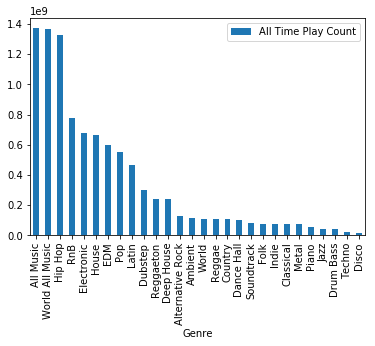

In [257]:
plt.figure(figsize=(100, 100))

df_allTimePlays.plot.bar(y='All Time Play Count')
plt.show()


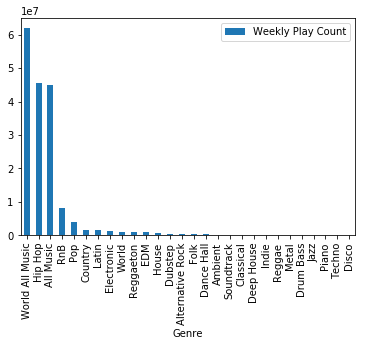

In [260]:
plt.figure(figsize=(100, 100))

df_weeklyPlays.plot.bar(y='Weekly Play Count')
plt.show()


In [15]:
df_allTimePlays.to_csv('allTimePlays.csv', sep=',', index=False)
df_weeklyPlays.to_csv('allTimePlays.csv', sep=',', index=False)

NameError: name 'df_allTimePlays' is not defined